<a href="https://colab.research.google.com/github/Quantum00000/Machine_Learning_And_AI/blob/main/Machine_Learning_with_python_and_scikit_learn_(JOVIAN)_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION:**
​ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

​Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

​You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers

csv- insurance.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Note-** import plotly.express as px  is a AI for matplotlib

In [2]:
medical_df=pd.read_csv('insurance.csv')

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Note- To import csv file from url

---

EXAMPLE-medical_charges_url='https/---------'

from urllib.request import urlretrieve

urlretrieve(medical_charges_url,'medical.csv')

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


AGE

In [6]:
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

BMI

In [7]:
fig=px.histogram(medical_df,x='bmi', title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()

Charges

In [8]:
fig=px.histogram(medical_df,x='charges',title="Distribution of Charges(Across smokers and non smokers)",color='smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig=px.histogram(medical_df,x='charges',title="Distribution of Charges(Across male and female)",color='sex')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig=px.histogram(medical_df,x='charges',title="Distribution of Charges(Across different Regions)",color='region')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [12]:
fig=px.histogram(medical_df,x='smoker',
                   color='sex',
                 title='Distribution of smokers via male or female')
fig.show()

Charges vs age

In [13]:
fig=px.scatter(medical_df, x='age',y='charges',color='smoker',opacity=0.8,title='Age and charges distribution based on smokers')
fig.show()

In [14]:
fig=px.scatter(medical_df, x='bmi',y='charges',color='smoker',opacity=0.8,title='BMI and charges distribution based on smokers')
fig.show()

In [15]:
fig=px.violin(medical_df, x='children',y='charges',title='children and charges distribution based on smokers')
fig.show()

# **Correlation**

In [16]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [17]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

**Note-** the bigger is the correlation value the more that field is related to the prediction field

In [18]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [19]:
smoker_value={'no':0, 'yes':1}
smoker_int=medical_df.smoker.map(smoker_value)

In [20]:
smoker_int

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [21]:
medical_df.charges.corr(smoker_int)

np.float64(0.787251430498478)

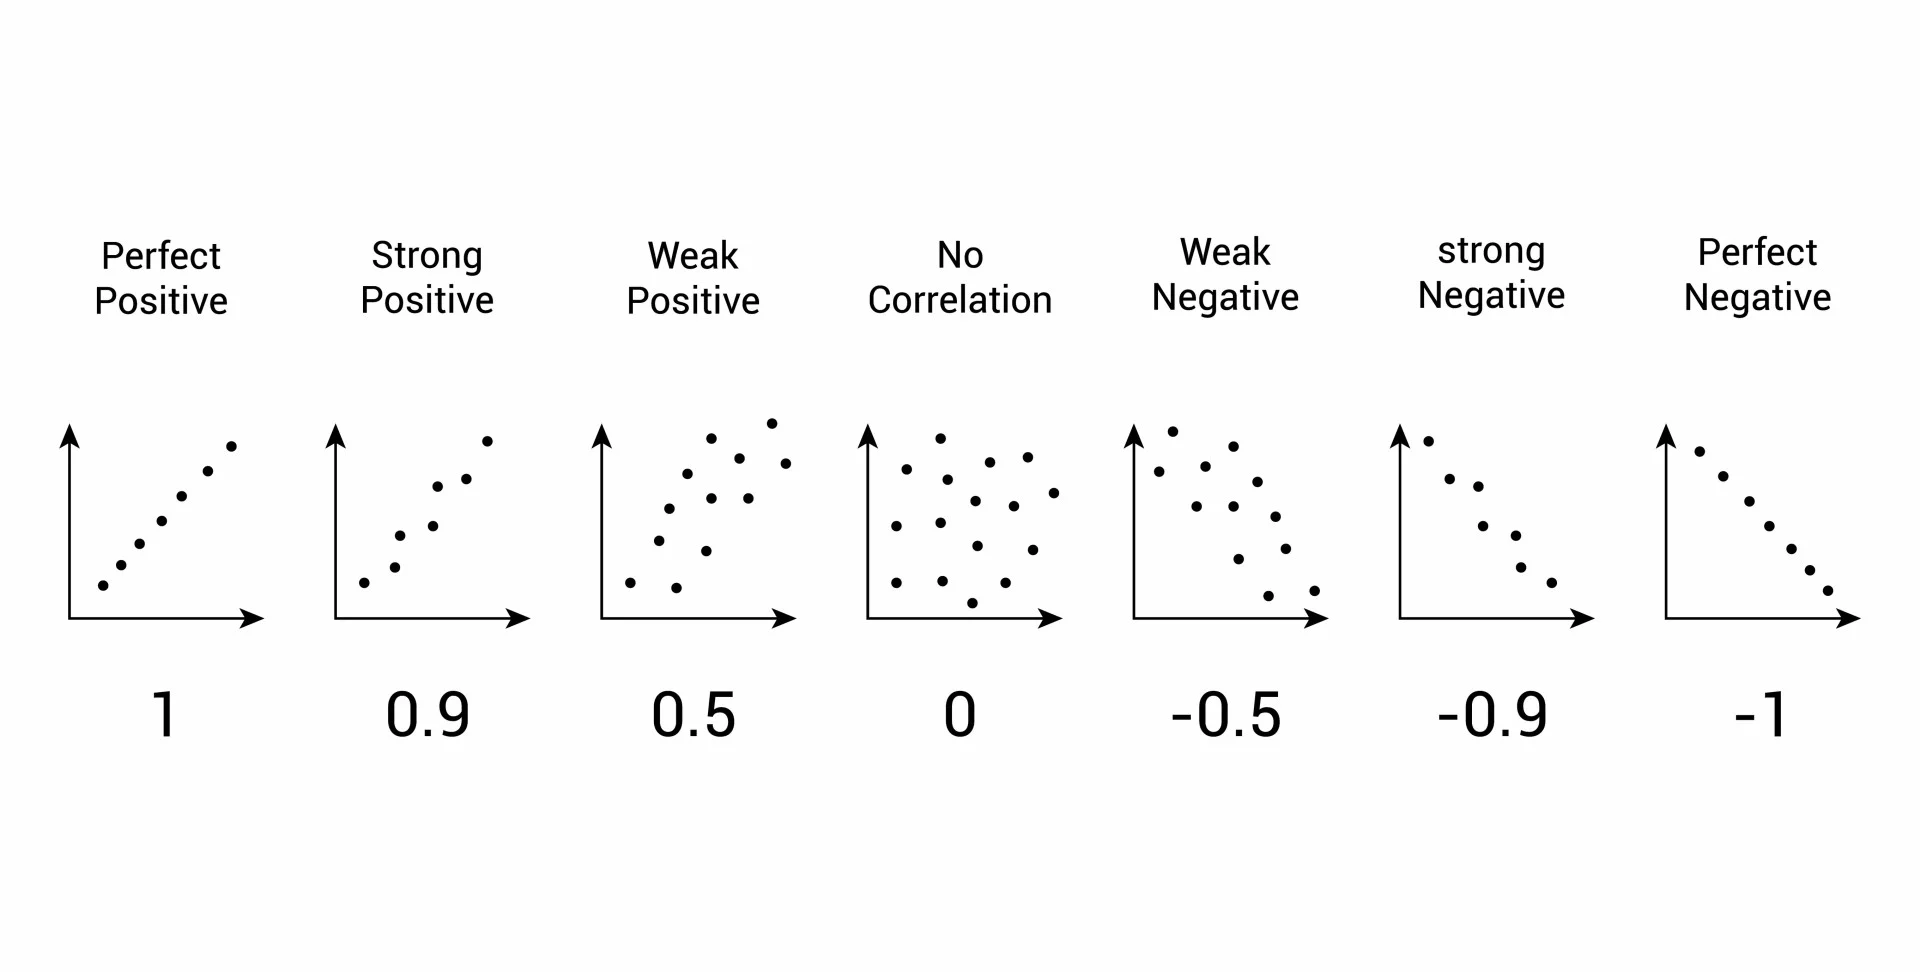

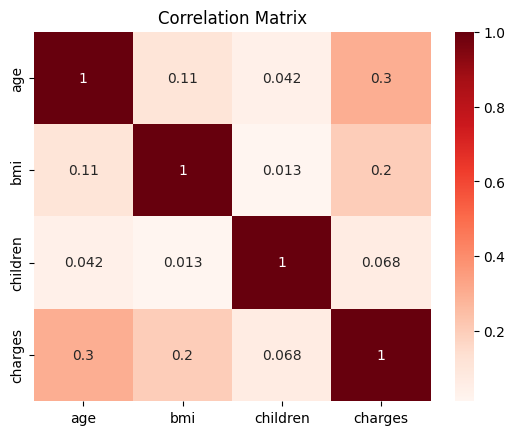

In [22]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(),
            cmap='Reds', annot=True)
plt.title("Correlation Matrix")
plt.show()


# **Linear Regression using a single feature**

In [23]:
non_smoker_df = medical_df[medical_df.smoker=='no']

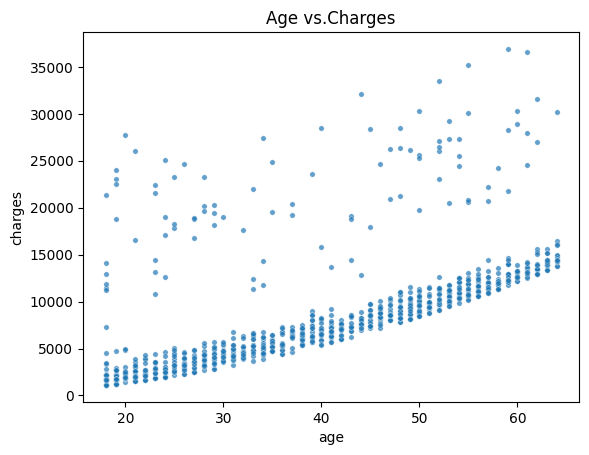

In [24]:
plt.title('Age vs.Charges')
sns.scatterplot(data=non_smoker_df,x='age', y='charges', alpha=0.7 , s=15);

lets build our very first model called estimate_charges model

In [25]:
def estimate_charges(age, w,b):
  return w * age + b

Let the value of w and b-

In [26]:
w=50
b=100

In [27]:
ages= non_smoker_df.age
estimated_charges_line= estimate_charges(ages,w,b)

Text(0, 0.5, 'estimate_charges')

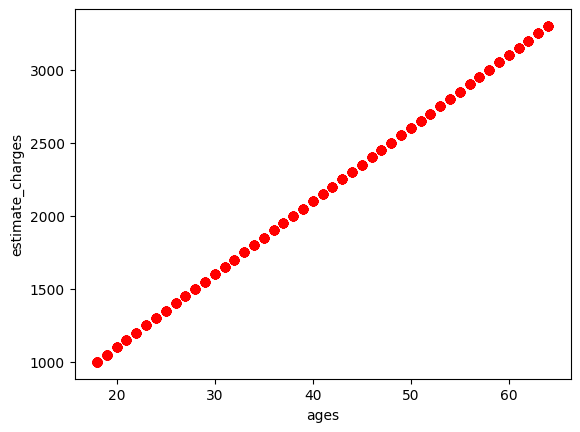

In [28]:
plt.scatter(ages,estimated_charges_line,color='red')
plt.xlabel('ages')
plt.ylabel('estimate_charges')

compairing estimate_charges with actual data variation

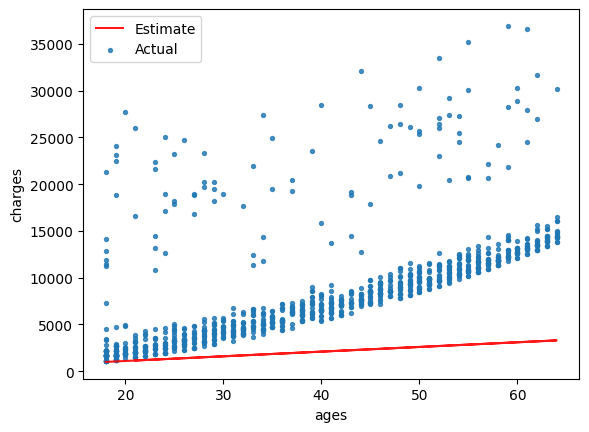

In [29]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges_line,'r',alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend(['Estimate','Actual']);

Observation- line is too far from the actual data trend that means prediction is still bad

In [30]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  estimate_charge=estimate_charges(ages,w,b)
  plt.plot(ages,estimate_charge,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('ages')
  plt.ylabel('charges')
  plt.legend(['Estimate','Actual'])
  plt.show()

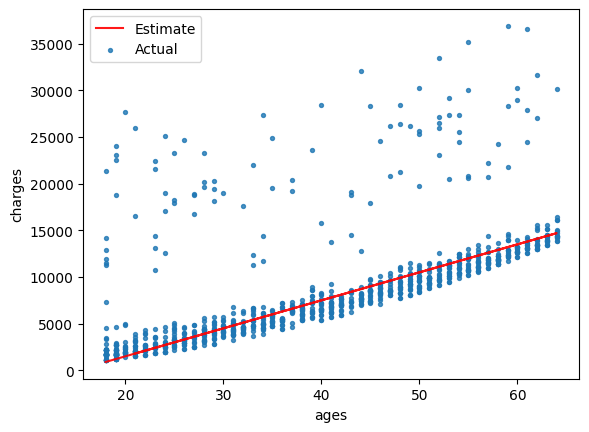

In [31]:
try_parameters(300,-4500)

**RMSE(Root Mean Square Value)**

In [32]:
def rmse(target,prediction):
  return np.sqrt(np.mean(np.square(target-prediction)))

In [33]:
w=50
b=100

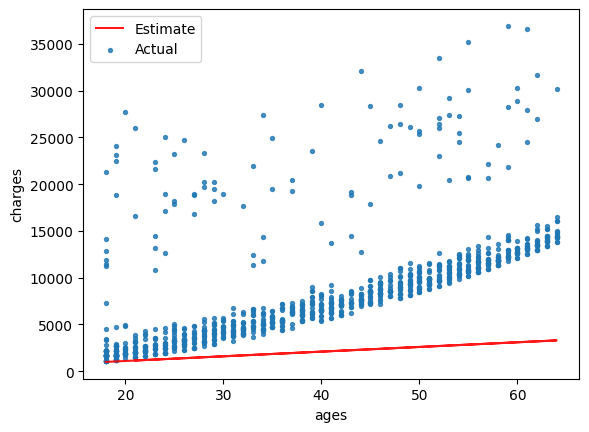

In [34]:
try_parameters(w,b)

In [35]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df['age'],w,b)

In [36]:
rmse(targets,predicted)

np.float64(8461.949562575493)

Ordinary gradient descent or stochastic gradient descent methods can be used to reduce to rmse, but we will use libraries for that, which is Scikit-learn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
inputs=non_smoker_df[['age']]
target=non_smoker_df['charges']

In [40]:
model.fit(inputs,target)

LinearRegression()

In [41]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [42]:
predictions=model.predict(inputs)

In [43]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [44]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [45]:
rmse(target,predictions)

np.float64(4662.505766636395)

In [46]:
# w
model.coef_

array([267.24891283])

In [47]:
# b
model.intercept_

np.float64(-2091.4205565650864)

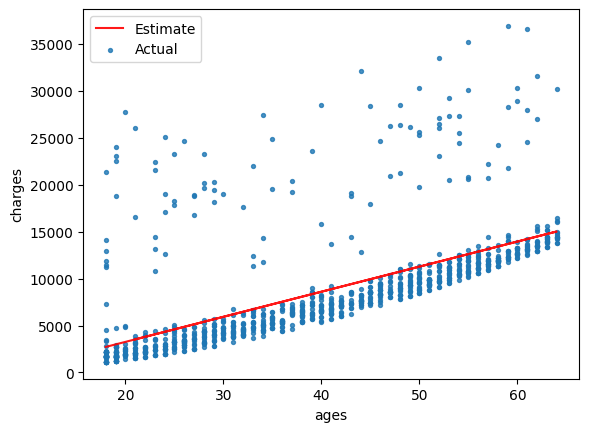

In [48]:
try_parameters(model.coef_,model.intercept_)

Trying SDGRegressor

In [49]:
from sklearn.linear_model import SGDRegressor

In [50]:
model2=SGDRegressor()

In [51]:
model2.fit(inputs,target)

SGDRegressor()

In [52]:
prediction2=model2.predict(inputs)

In [53]:
prediction2

array([ 4241.11232164,  9678.80572458, 12397.65242605, ...,
        4241.11232164,  4241.11232164,  5872.42034252])

In [54]:
rmse(target,prediction2)

np.float64(9600.930083972735)

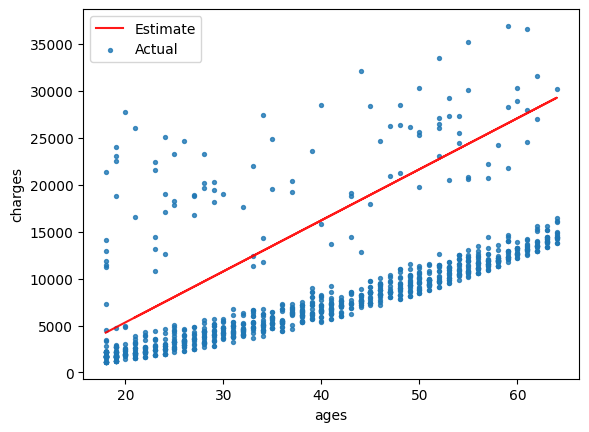

In [55]:
try_parameters(model2.coef_,model2.intercept_)

# **Smokers**

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
def try_parameters2(w,b):
  ages=smoker_df.age
  target=smoker_df.charges
  estimate_charge=estimate_charges(ages,w,b)
  plt.plot(ages,estimate_charge,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('ages')
  plt.ylabel('charges')
  plt.legend(['Estimate','Actual'])
  plt.show()

In [58]:
model2=LinearRegression()

In [59]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [60]:
input2=smoker_df[['age']]
target2=smoker_df['charges']

In [61]:
model2_lr=model2.fit(input2,target2)

In [62]:
prediction3=model2_lr.predict(input2)

In [63]:
prediction3

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [64]:

target2

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [65]:
rmse(target2,prediction3)

np.float64(10711.00334810241)

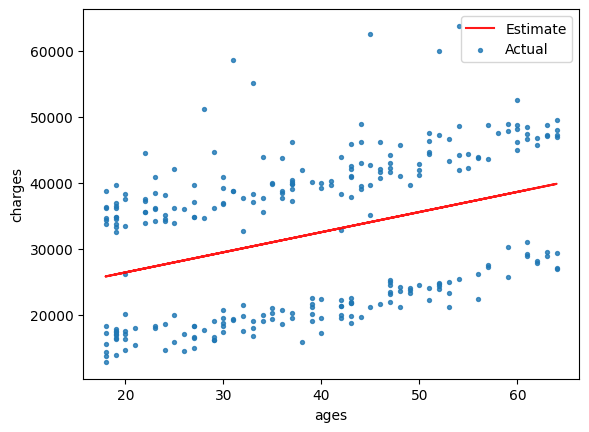

In [66]:
try_parameters2(model2_lr.coef_,model2_lr.intercept_)

Linear Regression Using Multiple Feature

In [67]:
inputs,target = non_smoker_df[['age','bmi']],non_smoker_df['charges']
model =LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 4662.3128354612945


Charges=w1 x age + w2 x bmi + b

In [68]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [69]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

In [70]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

with above code , we analyse that bmi has no such relationship with charges or model so predicting charges on the basis of bmi is insufficient

In [71]:
inputs,target = medical_df[['age','bmi','children']],medical_df['charges']
model01 =LinearRegression().fit(inputs,target)
predictions = model01.predict(inputs)
loss = rmse(target,predictions)
print('Loss:',loss)

Loss: 11355.317901125973


Using Categorical Feature for Machine Learning

1-Binary categories: convert them into 0 and 1.

2-IF categories are more then 2 then perform one-hot encoding, create a new  column for each categoriees with 0s and 1s.

3-If categories have neutral order like (cold,neutral,warm, hot) then convert them into numbers like (1,2,3,4).

# Binary categories

In [72]:
smoker_code={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)

In [73]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [74]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [75]:
inputs,target = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model01 =LinearRegression().fit(inputs,target)
predictions = model01.predict(inputs)
loss = rmse(target,predictions)
print('Loss:',loss)

Loss: 6056.439217188081


# One-hot Encoding

Index | categorical column

catA|catB|catC

1-    |1   |0   |0

2-    |0   |1   |0

3-    |0   |0   |1

In [76]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [77]:
one_hot=enc.transform(medical_df[['region']]).toarray()

In [78]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [79]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


until now we were using numerical data , now lets include cetegorical data too


In [80]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [81]:
sex_code={'female':0,'male':1}
medical_df['sex_code']=medical_df.sex.map(sex_code)

In [82]:
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southwest','southeast']
input=medical_df[input_cols]
target=medical_df['charges']

model=LinearRegression().fit(input,target)
prediction=model.predict(input)

loss=rmse(target,prediction)
print('loss:',loss)

loss: 6041.6796511744515


# **Feature Scaling**

It is used for explaining why model is predicting such output , its like defining how things works.

In [83]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -373.04175627,
        -448.01281436])

In [84]:
model.intercept_

np.float64(-12525.54781119545)

In [85]:
weight_df=pd.DataFrame({
    'feature' : np.append(input_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southwest,-373.041756
8,southeast,-448.012814
9,1,-12525.547811


Standardization: z= (x-𝜇)/𝜎

𝜇 == Mean

𝜎==standard deviation


In [86]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0,0


In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
numeric_cols = ['age','bmi','children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [89]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [90]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

we can now scale data as follows:

In [91]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now be combined with cetegorical data

In [92]:
cat_cols=['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data=medical_df[cat_cols].values

In [93]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)

In [94]:
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

Predicton after scaling

In [95]:
model_scaled=LinearRegression().fit(inputs,target)
predit_scaled=model_scaled.predict(inputs)
loss_scaled=rmse(target,predit_scaled)
print('loss:',loss_scaled)

loss: 6041.6796511744515


In [97]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})
weight_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,-131.314359
7,southwest,-373.041756
8,southeast,-448.012814
9,1,-12525.547811


**How to Approach a machine Learning Problem**

1-Explore the data and find correlation between inputs and targets

2-Pick the right model,loss fuctions and optimizer for the problem at hand

3-Scale numeric variables and one-hot encoder categorical data

4-Set aside a test set (using a fraction of the training set)

5- Train the model

6- Make predictions on the test set and compute the loss